## <center> Anti-Money Laundering 

<br>
<br>
<br>
<br>


<br><br>
<br>


In [1]:
import pandas as pd

import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns 

sns.set(color_codes = True)


In [2]:
import warnings

warnings.filterwarnings('ignore')

In [1]:
import os 

In [2]:
os.getcwd()

'C:\\Users\\shreyas'

In [3]:
df = pd.read_csv("E:\\Download 2023 Data Science\\Data Sets\\Loan_Approve_it_or_Not.csv")

df.head(15)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,...,N,N,NaN,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,...,N,N,24-Jun-91,22-Jul-80,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,...,N,Y,NaN,30-Jun-98,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00"
8,1000104006,TURTLE BEACH INN,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,28-Feb-97,1997,...,N,N,NaN,31-Jul-97,"$305,000.00",$0.00,P I F,$0.00,"$305,000.00","$228,750.00"
9,1000124001,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,28-Feb-97,1997,...,N,Y,NaN,30-Apr-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"


<br>
<br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br>
<br>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [5]:
df.isnull().any()

LoanNr_ChkDgt        False
Name                  True
City                  True
State                 True
Zip                  False
Bank                  True
BankState             True
NAICS                False
ApprovalDate         False
ApprovalFY           False
Term                 False
NoEmp                False
NewExist              True
CreateJob            False
RetainedJob          False
FranchiseCode        False
UrbanRural           False
RevLineCr             True
LowDoc                True
ChgOffDate            True
DisbursementDate      True
DisbursementGross    False
BalanceGross         False
MIS_Status            True
ChgOffPrinGr         False
GrAppv               False
SBA_Appv             False
dtype: bool

It is looking like there are a lot of missing values in the Data. 

Default column has missing values as we can see. 

<br>
<br>
<br>


In [6]:
df.shape

(899164, 27)

In [7]:
df.isnull()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
899160,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
899161,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
899162,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().any()

LoanNr_ChkDgt        False
Name                  True
City                  True
State                 True
Zip                  False
Bank                  True
BankState             True
NAICS                False
ApprovalDate         False
ApprovalFY           False
Term                 False
NoEmp                False
NewExist              True
CreateJob            False
RetainedJob          False
FranchiseCode        False
UrbanRural           False
RevLineCr             True
LowDoc                True
ChgOffDate            True
DisbursementDate      True
DisbursementGross    False
BalanceGross         False
MIS_Status            True
ChgOffPrinGr         False
GrAppv               False
SBA_Appv             False
dtype: bool

In [9]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [10]:
df.ChgOffDate.isnull().sum()

736465

In [11]:
df.shape

(899164, 27)

In [12]:
(736465/899164)*100

81.90552557709161

### The dropna() method removes the rows that contains NULL values. 

<br>

### We cannot use `ChgoffDate` column and also we cannot Drop the Rows[Dropna()].

<br>

### As missing rows for `ChgoffDate` is 7,36,000+ rows which is 81% of our Dataset. 

<br>


### We will remove this column and then use Dropna() function. 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [13]:
df.columns 

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [14]:
dff = df.drop(['ChgOffDate'], axis = 1 )

In [15]:
dff.head(3)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,0,N,Y,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,0,N,Y,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,0,N,N,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"


In [16]:
dff.shape

(899164, 26)

In [17]:
dff.dropna(inplace=True)

In [18]:
dff.isna().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

In [19]:
dff.isnull().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

### We removed the `ChgOffDate` column now as it had very high number of missing Values

<br>

### We also removed all the Rows which had missing values


<br>

### Our Data is now Free of Missing Values 

<br>
<br>
<br>
<br>
<br>
<br>


In [20]:
dff.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'DisbursementDate', 'DisbursementGross', 'BalanceGross',
       'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [21]:
dff.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,0,N,Y,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,0,N,Y,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,0,N,N,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,0,N,Y,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,0,N,N,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [22]:
# To display all the columns in the Dataframe 

pd.set_option('display.max_columns', None)


In [23]:
dff.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


<br>
<br>

### We can now see all the columns in the Dataframe 

<br>
<br>
<br>
<br>
<br>
<br>
<br>

# <center>   PCA - Principal Component Analysis 

<br>

### We are going to do PCA on these columns of the Dataset - Eligible for PCA -  10/26 Columns 

<br>


In [24]:
# Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,RetainedJob,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv

In [25]:

# We need to Remove the "$" Sign in the Rows

# Re-check the Columns - Numerical or Categorical  

# DisbursementGross,RetainedJob,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv

In [26]:
dff.shape

(886240, 26)

## 8 Lakh+ Rows in Dataset

In [27]:
dfPCA = dff.loc[:,['Term','NoEmp','CreateJob','RetainedJob','DisbursementGross','RetainedJob','BalanceGross','ChgOffPrinGr','GrAppv','SBA_Appv']] 

In [28]:
dfPCA.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,RetainedJob,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,84,4,0,0,"$60,000.00",0,$0.00,$0.00,"$60,000.00","$48,000.00"
1,60,2,0,0,"$40,000.00",0,$0.00,$0.00,"$40,000.00","$32,000.00"
2,180,7,0,0,"$287,000.00",0,$0.00,$0.00,"$287,000.00","$215,250.00"
3,60,2,0,0,"$35,000.00",0,$0.00,$0.00,"$35,000.00","$28,000.00"
4,240,14,7,7,"$229,000.00",7,$0.00,$0.00,"$229,000.00","$229,000.00"


In [29]:
dfPCA.shape

(886240, 10)

<br>

### We created the 10 Column Numercial Dataset using df.Loc feature

<br>
<br>
<br>




### Taking too much time with 8 Lakh Rows -> Will make it 50,000 Rows  

In [30]:
dfs = dfPCA.iloc[0:55000:]

In [31]:
dfs.shape

(55000, 10)

<br>
<br>

# Major Steps in doing Principal Component Analysis 

<br>
<br>
<br>

### Data Pre-Processing -> Correct Data TYpe, Rows in correct format

<br>

### First the Numerical Columns are standardized 


<br>

### Outlier Treatment

<br>


### CoVariance Matrix 


<br>

### Eigen Values and Eigen Vectors 


<br>

### Variance and Cummulative Variance  

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>









In [32]:
dfs.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,RetainedJob,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,84,4,0,0,"$60,000.00",0,$0.00,$0.00,"$60,000.00","$48,000.00"
1,60,2,0,0,"$40,000.00",0,$0.00,$0.00,"$40,000.00","$32,000.00"
2,180,7,0,0,"$287,000.00",0,$0.00,$0.00,"$287,000.00","$215,250.00"
3,60,2,0,0,"$35,000.00",0,$0.00,$0.00,"$35,000.00","$28,000.00"
4,240,14,7,7,"$229,000.00",7,$0.00,$0.00,"$229,000.00","$229,000.00"


In [33]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55000 entries, 0 to 55588
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Term               55000 non-null  int64 
 1   NoEmp              55000 non-null  int64 
 2   CreateJob          55000 non-null  int64 
 3   RetainedJob        55000 non-null  int64 
 4   DisbursementGross  55000 non-null  object
 5   RetainedJob        55000 non-null  int64 
 6   BalanceGross       55000 non-null  object
 7   ChgOffPrinGr       55000 non-null  object
 8   GrAppv             55000 non-null  object
 9   SBA_Appv           55000 non-null  object
dtypes: int64(5), object(5)
memory usage: 4.6+ MB


<br>

### We can see that the Columns are Numerical but they are saved as Object[String Type]

<br>

### We need to convert to int64 type

<br>

### We need to remove - - > " "[Space] &nbsp;&nbsp;&nbsp;  '$'[Dollar], &nbsp;&nbsp;&nbsp;&nbsp; ','[Comma] &nbsp;&nbsp;&nbsp;&nbsp; and &nbsp;&nbsp;&nbsp; '.'[Dot] &nbsp;&nbsp; from the cells 

<br>
<br>
<br>
<br>
<br>
<br>


<br>

## Removing $ Sign from Rows 

<br>


In [34]:
dfs['DisbursementGross'] = dfs['DisbursementGross'].str.replace('$','')

dfs['BalanceGross'] = dfs['BalanceGross'].str.replace('$','')

dfs['ChgOffPrinGr'] = dfs['ChgOffPrinGr'].str.replace('$','')

dfs['GrAppv'] = dfs['GrAppv'].str.replace('$','')

dfs['SBA_Appv'] = dfs['SBA_Appv'].str.replace('$','')

In [35]:
dfs.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,RetainedJob,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,84,4,0,0,"60,000.00",0,0.00,0.00,"60,000.00","48,000.00"
1,60,2,0,0,"40,000.00",0,0.00,0.00,"40,000.00","32,000.00"
2,180,7,0,0,"287,000.00",0,0.00,0.00,"287,000.00","215,250.00"
3,60,2,0,0,"35,000.00",0,0.00,0.00,"35,000.00","28,000.00"
4,240,14,7,7,"229,000.00",7,0.00,0.00,"229,000.00","229,000.00"


<br>
<br>
<br>


## Removing WhiteSpace in the Cells/Rows - - > "  "[Space]

<br>

In [36]:
dfs['DisbursementGross'] = dfs['DisbursementGross'].replace(' ','')

dfs['BalanceGross'] = dfs['BalanceGross'].replace(' ','')

dfs['ChgOffPrinGr'] = dfs['ChgOffPrinGr'].replace(' ','')

dfs['GrAppv'] = dfs['GrAppv'].replace(' ','')

dfs['SBA_Appv'] = dfs['SBA_Appv'].replace(' ','')

In [37]:
dfs.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,RetainedJob,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,84,4,0,0,"60,000.00",0,0.00,0.00,"60,000.00","48,000.00"
1,60,2,0,0,"40,000.00",0,0.00,0.00,"40,000.00","32,000.00"
2,180,7,0,0,"287,000.00",0,0.00,0.00,"287,000.00","215,250.00"
3,60,2,0,0,"35,000.00",0,0.00,0.00,"35,000.00","28,000.00"
4,240,14,7,7,"229,000.00",7,0.00,0.00,"229,000.00","229,000.00"


<br>

### As checked in further codes trailing whitespaces are NOT Gone from the Cells/Rows. 

<br>

### Lets use all other methods and check - which method works to remove `WhiteSpaces`

<br>
<br>
<br>
<br>


<br>
<br>
<br>
<br>

<br>

In [38]:
dfs['DisbursementGross'] = dfs['DisbursementGross'].str.strip()

dfs['BalanceGross'] = dfs['BalanceGross'].str.strip()

dfs['ChgOffPrinGr'] = dfs['ChgOffPrinGr'].str.strip()

dfs['GrAppv'] = dfs['GrAppv'].str.strip()

dfs['SBA_Appv'] = dfs['SBA_Appv'].str.strip()

<br>

### This Str.Strip() method worked to remove `WhiteSpaces`

<br>
<br>
<br>
<br>


In [39]:
dfs.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,RetainedJob,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,84,4,0,0,"60,000.00",0,0.00,0.00,"60,000.00","48,000.00"
1,60,2,0,0,"40,000.00",0,0.00,0.00,"40,000.00","32,000.00"
2,180,7,0,0,"287,000.00",0,0.00,0.00,"287,000.00","215,250.00"
3,60,2,0,0,"35,000.00",0,0.00,0.00,"35,000.00","28,000.00"
4,240,14,7,7,"229,000.00",7,0.00,0.00,"229,000.00","229,000.00"


In [40]:
dfss = dfs

In [41]:
dfss.head() 

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,RetainedJob,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,84,4,0,0,"60,000.00",0,0.00,0.00,"60,000.00","48,000.00"
1,60,2,0,0,"40,000.00",0,0.00,0.00,"40,000.00","32,000.00"
2,180,7,0,0,"287,000.00",0,0.00,0.00,"287,000.00","215,250.00"
3,60,2,0,0,"35,000.00",0,0.00,0.00,"35,000.00","28,000.00"
4,240,14,7,7,"229,000.00",7,0.00,0.00,"229,000.00","229,000.00"


<br>

## Creating Dataframe copy so that we dont have to go Back once again 

<br>

## We can start from here if anything goes as not planned

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Let's Convert the Columns from &nbsp;&nbsp; Object &nbsp;&nbsp; to &nbsp;&nbsp; Integer Type 

<br>

<br>
<br>
<br>

## Converting Object Type Columns to Float type[Numeric] - for PCA  


<br>


In [42]:
#dfs = dfs.apply(pd.to_numeric, errors='coerce')

<br>

## We can see columns converted to Float64 type using `pd.numeric`

<br>


## Gave to many NaN values cannot be used

<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br><br>
<br><br>
<br><br>
<br>



## We want to convert the Object - - > to - - > Float[Numeric Data Type]


<br>

In [43]:
dfss.dtypes

Term                  int64
NoEmp                 int64
CreateJob             int64
RetainedJob           int64
DisbursementGross    object
RetainedJob           int64
BalanceGross         object
ChgOffPrinGr         object
GrAppv               object
SBA_Appv             object
dtype: object

In [44]:
dfss.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,RetainedJob,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,84,4,0,0,"60,000.00",0,0.00,0.00,"60,000.00","48,000.00"
1,60,2,0,0,"40,000.00",0,0.00,0.00,"40,000.00","32,000.00"
2,180,7,0,0,"287,000.00",0,0.00,0.00,"287,000.00","215,250.00"
3,60,2,0,0,"35,000.00",0,0.00,0.00,"35,000.00","28,000.00"
4,240,14,7,7,"229,000.00",7,0.00,0.00,"229,000.00","229,000.00"




<br>
<br><br>
<br><br>
<br><br>
<br>


## We had to remove the ","[Comma] from the String to convert to Float 

<br>
<br>

In [45]:
dfss['DisbursementGross'] = dfss['DisbursementGross'].str.replace(',','')

dfss['BalanceGross'] = dfss['BalanceGross'].str.replace(',','')

dfss['ChgOffPrinGr'] = dfss['ChgOffPrinGr'].str.replace(',','')

dfss['GrAppv'] = dfss['GrAppv'].str.replace(',','')

dfss['SBA_Appv'] = dfss['SBA_Appv'].str.replace(',','')

In [46]:
dfss.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,RetainedJob,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,84,4,0,0,60000.00,0,0.00,0.00,60000.00,48000.00
1,60,2,0,0,40000.00,0,0.00,0.00,40000.00,32000.00
2,180,7,0,0,287000.00,0,0.00,0.00,287000.00,215250.00
3,60,2,0,0,35000.00,0,0.00,0.00,35000.00,28000.00
4,240,14,7,7,229000.00,7,0.00,0.00,229000.00,229000.00


In [47]:
dfss['DisbursementGross'] = dfss['DisbursementGross'].astype(float)

dfss['BalanceGross'] = dfss['BalanceGross'].astype(float)

dfss['ChgOffPrinGr'] = dfss['ChgOffPrinGr'].astype(float)

dfss['GrAppv'] = dfss['GrAppv'].astype(float)

dfss['SBA_Appv'] = dfss['SBA_Appv'].astype(float)

In [48]:
dfss.dtypes

Term                   int64
NoEmp                  int64
CreateJob              int64
RetainedJob            int64
DisbursementGross    float64
RetainedJob            int64
BalanceGross         float64
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

<br>

## We have sucessfully converted the columns to Float 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>



In [49]:
dff = dfss


## Creating a Dataframe Copy 

<br>
<br>

## Outlier treatment   - - -   >  then  - - -   >  ZScore/Standardizing  

<br>
<br>

<br>
<br>


In [50]:
dff.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,RetainedJob,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,84,4,0,0,60000.0,0,0.0,0.0,60000.0,48000.0
1,60,2,0,0,40000.0,0,0.0,0.0,40000.0,32000.0
2,180,7,0,0,287000.0,0,0.0,0.0,287000.0,215250.0
3,60,2,0,0,35000.0,0,0.0,0.0,35000.0,28000.0
4,240,14,7,7,229000.0,7,0.0,0.0,229000.0,229000.0


<AxesSubplot:>

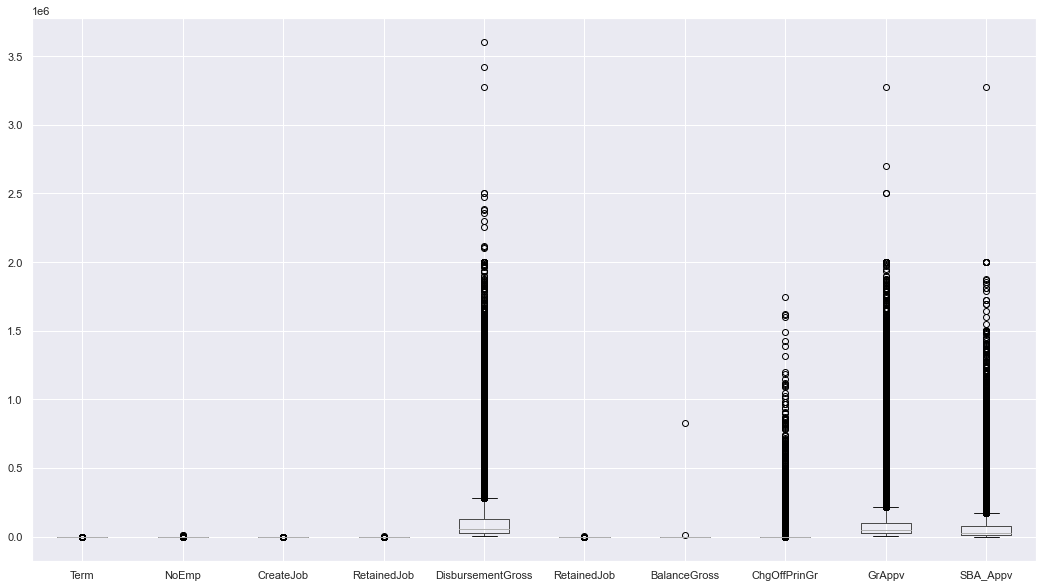

In [51]:
plt.figure(figsize = (18,10))

dff.boxplot()

<br>
<br>


## IQR is the best Outlier treatment method 



In [52]:
dff.columns

Index(['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross',
       'RetainedJob', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [53]:
dff.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,RetainedJob,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,84,4,0,0,60000.0,0,0.0,0.0,60000.0,48000.0
1,60,2,0,0,40000.0,0,0.0,0.0,40000.0,32000.0
2,180,7,0,0,287000.0,0,0.0,0.0,287000.0,215250.0
3,60,2,0,0,35000.0,0,0.0,0.0,35000.0,28000.0
4,240,14,7,7,229000.0,7,0.0,0.0,229000.0,229000.0


In [54]:
Q1_Term = dff['Term'].quantile(0.25)
Q2_Term = dff['Term'].quantile(0.50)
Q3_Term = dff['Term'].quantile(0.75)




IQR_Term = Q1_Term - Q3_Term

Upper_Term = Q1_Term - 1.5*(IQR_Term)

Lower_Term = Q3_Term + 1.5*(IQR_Term)



print(Q1_Term)
print(Q2_Term)
print(Q3_Term)
print(Upper_Term)
print(Lower_Term)

57.0
84.0
84.0
97.5
43.5


In [55]:
Q1_NoEmp = dff['NoEmp'].quantile(0.25)
Q2_NoEmp = dff['NoEmp'].quantile(0.50)
Q3_NoEmp = dff['NoEmp'].quantile(0.75)



IQR_NoEmp = Q1_NoEmp - Q3_NoEmp

Upper_NoEmp = Q1_NoEmp - 1.5*(IQR_NoEmp)

Lower_NoEmp = Q3_NoEmp + 1.5*(IQR_NoEmp)



print(Q1_NoEmp)
print(Q2_NoEmp)
print(Q3_NoEmp)
print(Upper_NoEmp)
print(Lower_NoEmp)

2.0
4.0
8.0
11.0
-1.0


In [56]:
Q1_CreateJob = dff['CreateJob'].quantile(0.25)
Q2_CreateJob = dff['CreateJob'].quantile(0.50)
Q3_CreateJob = dff['CreateJob'].quantile(0.75)



IQR_CreateJob = Q1_CreateJob - Q3_CreateJob

Upper_CreateJob = Q1_CreateJob - 1.5*(IQR_CreateJob)

Lower_CreateJob = Q3_CreateJob + 1.5*(IQR_CreateJob)



print(Q1_CreateJob)
print(Q2_CreateJob)
print(Q3_CreateJob)
print(Upper_CreateJob)
print(Lower_CreateJob)

0.0
0.0
0.0
0.0
0.0


<AxesSubplot:xlabel='CreateJob'>

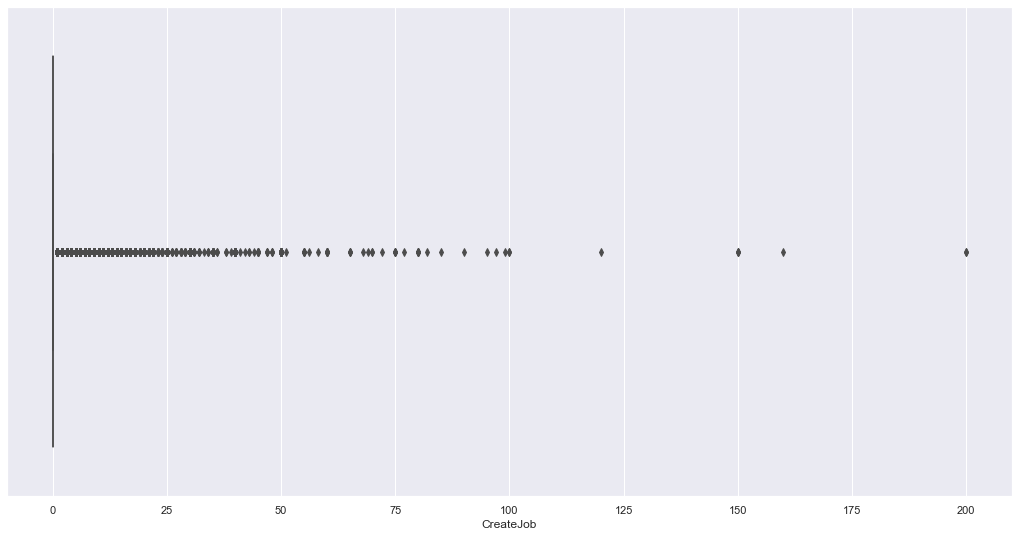

In [57]:
plt.figure(figsize = (18,9))

sns.boxplot(x = 'CreateJob' , data = dff)

In [58]:
dff['CreateJob'].value_counts()

0      44252
1       3318
2       2690
3       1128
4        738
       ...  
68         1
82         1
72         1
58         1
160        1
Name: CreateJob, Length: 72, dtype: int64

In [59]:
dff['CreateJob'].nunique()

72



## The Q1, Q2 and Q3 are all Zero.   

<br>
<br>
<br>

## There are 72 different Unique values. 

<br>
<br>
<br>

## There are 44,000+ values as Zero. So, its impacting IQR. o

<br>
<br>
<br>

## Not getting the Proper values via IQR for Outlier treatment. 

<br>
<br>
<br>

## Need to use some other method.

<br>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br><br>
<br>
<br>



In [60]:
dffee = dff.T.drop_duplicates().T

In [61]:
Q1_RetainedJob = dffee['RetainedJob'].quantile(0.25)
Q2_RetainedJob = dffee['RetainedJob'].quantile(0.50)
Q3_RetainedJob = dffee['RetainedJob'].quantile(0.75)

IQR_RetainedJob = Q1_RetainedJob - Q3_RetainedJob

Upper_RetainedJob = Q1_RetainedJob - 1.5*(IQR_RetainedJob)

Lower_RetainedJob = Q3_RetainedJob + 1.5*(IQR_RetainedJob)

print(Q1_RetainedJob)
print(Q2_RetainedJob)
print(Q3_RetainedJob)
print(Upper_RetainedJob)
print(Lower_RetainedJob)

0.0
0.0
3.0
4.5
-1.5


In [62]:
Q1_DisbursementGross = dff['DisbursementGross'].quantile(0.25)
Q2_DisbursementGross = dff['DisbursementGross'].quantile(0.50)
Q3_DisbursementGross = dff['DisbursementGross'].quantile(0.75)


IQR_DisbursementGross = Q1_DisbursementGross - Q3_DisbursementGross

Upper_DisbursementGross = Q1_DisbursementGross - 1.5*(IQR_DisbursementGross)

Lower_DisbursementGross = Q3_DisbursementGross + 1.5*(IQR_DisbursementGross)


print(Q1_DisbursementGross)
print(Q2_DisbursementGross)
print(Q3_DisbursementGross)
print(Upper_DisbursementGross)
print(Lower_DisbursementGross)

28000.0
57198.5
130000.0
181000.0
-23000.0



# Already converted before in the code to Float



dff['DisbursementGross'] = dfss['DisbursementGross'].astype(int)

dff['BalanceGross'] = dfss['BalanceGross'].astype(int)

dff['ChgOffPrinGr'] = dfss['ChgOffPrinGr'].astype(int)

dff['GrAppv'] = dfss['GrAppv'].astype(int)

dff['SBA_Appv'] = dfss['SBA_Appv'].astype(int)

In [63]:
dff.dtypes 

Term                   int64
NoEmp                  int64
CreateJob              int64
RetainedJob            int64
DisbursementGross    float64
RetainedJob            int64
BalanceGross         float64
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

In [64]:
dffee.dtypes

Term                 float64
NoEmp                float64
CreateJob            float64
RetainedJob          float64
DisbursementGross    float64
BalanceGross         float64
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

<br>

## We removed 2 similar column names "RetainedJob"

<br>

## There were 2 columns of "RetainedJob"

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br><br>
<br>
<br><br>
<br>
<br><br>
<br>
<br><br>
<br>
<br><br>
<br>
<br>

In [65]:
Q1_BalanceGross = dff['BalanceGross'].quantile(0.25)
Q2_BalanceGross = dff['BalanceGross'].quantile(0.50)
Q3_BalanceGross = dff['BalanceGross'].quantile(0.75)


IQR_BalanceGross = Q1_BalanceGross - Q3_BalanceGross

Upper_BalanceGross = Q1_BalanceGross - 1.5*(IQR_BalanceGross)

Lower_BalanceGross = Q3_BalanceGross + 1.5*(IQR_BalanceGross)


print(Q1_BalanceGross)
print(Q2_BalanceGross)
print(Q3_BalanceGross)
print(Upper_BalanceGross)
print(Lower_BalanceGross)

0.0
0.0
0.0
0.0
0.0


In [66]:
dff.columns 

Index(['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross',
       'RetainedJob', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [67]:
Q1_ChgOffPrinGr = dff['ChgOffPrinGr'].quantile(0.25)
Q2_ChgOffPrinGr = dff['ChgOffPrinGr'].quantile(0.50)
Q3_ChgOffPrinGr = dff['ChgOffPrinGr'].quantile(0.75)

IQR_ChgOffPrinGr = Q1_ChgOffPrinGr - Q3_ChgOffPrinGr

Upper_ChgOffPrinGr = Q1_ChgOffPrinGr - 1.5*(IQR_ChgOffPrinGr)

Lower_ChgOffPrinGr = Q3_ChgOffPrinGr + 1.5*(IQR_ChgOffPrinGr)

print(Q1_ChgOffPrinGr)
print(Q2_ChgOffPrinGr)
print(Q3_ChgOffPrinGr)
print(Upper_ChgOffPrinGr)
print(Lower_ChgOffPrinGr)

0.0
0.0
0.0
0.0
0.0


In [68]:
Q1_GrAppv = dff['GrAppv'].quantile(0.25)
Q2_GrAppv = dff['GrAppv'].quantile(0.50)
Q3_GrAppv = dff['GrAppv'].quantile(0.75)

IQR_GrAppv = Q1_GrAppv - Q3_GrAppv

Upper_GrAppv = Q1_GrAppv - 1.5*(IQR_GrAppv)

Lower_GrAppv = Q3_GrAppv + 1.5*(IQR_GrAppv)

print(Q1_GrAppv)
print(Q2_GrAppv)
print(Q3_GrAppv)
print(Upper_GrAppv)
print(Lower_GrAppv)

25000.0
50000.0
100000.0
137500.0
-12500.0


In [69]:
Q1_SBA_Appv = dff['SBA_Appv'].quantile(0.25)
Q2_SBA_Appv = dff['SBA_Appv'].quantile(0.50)
Q3_SBA_Appv = dff['SBA_Appv'].quantile(0.75)

IQR_SBA_Appv = Q1_SBA_Appv - Q3_SBA_Appv

Upper_SBA_Appv = Q1_SBA_Appv - 1.5*(IQR_SBA_Appv)

Lower_SBA_Appv = Q3_SBA_Appv + 1.5*(IQR_SBA_Appv)

print(Q1_SBA_Appv)
print(Q2_SBA_Appv)
print(Q3_SBA_Appv)
print(Upper_SBA_Appv)
print(Lower_SBA_Appv)

12500.0
25000.0
75000.0
106250.0
-18750.0


In [70]:
dffee.head(10)

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,84.0,4.0,0.0,0.0,60000.0,0.0,0.0,60000.0,48000.0
1,60.0,2.0,0.0,0.0,40000.0,0.0,0.0,40000.0,32000.0
2,180.0,7.0,0.0,0.0,287000.0,0.0,0.0,287000.0,215250.0
3,60.0,2.0,0.0,0.0,35000.0,0.0,0.0,35000.0,28000.0
4,240.0,14.0,7.0,7.0,229000.0,0.0,0.0,229000.0,229000.0
5,120.0,19.0,0.0,0.0,517000.0,0.0,0.0,517000.0,387750.0
6,45.0,45.0,0.0,0.0,600000.0,0.0,208959.0,600000.0,499998.0
7,84.0,1.0,0.0,0.0,45000.0,0.0,0.0,45000.0,36000.0
8,297.0,2.0,0.0,0.0,305000.0,0.0,0.0,305000.0,228750.0
9,84.0,3.0,0.0,0.0,70000.0,0.0,0.0,70000.0,56000.0


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br>

## These rows have 0 as 25th and 75th Quartile values 

<br>


## ChgOffPrinGr, &nbsp;&nbsp;&nbsp; BalanceGross, &nbsp;&nbsp;&nbsp; RetainedJob, &nbsp;&nbsp;&nbsp;CreateJob

<br>

## We may have to change the Outlier Replacement Value for these Manually

<br>
<br>
<br>
<br>


11044
0.0
12589.239418181818
1743300.0
0.0


0.0         41718
50000.0       314
10000.0       285
25000.0        90
100000.0       85
            ...  
27268.0         1
51161.0         1
43820.0         1
2541.0          1
23243.0         1
Name: ChgOffPrinGr, Length: 11044, dtype: int64

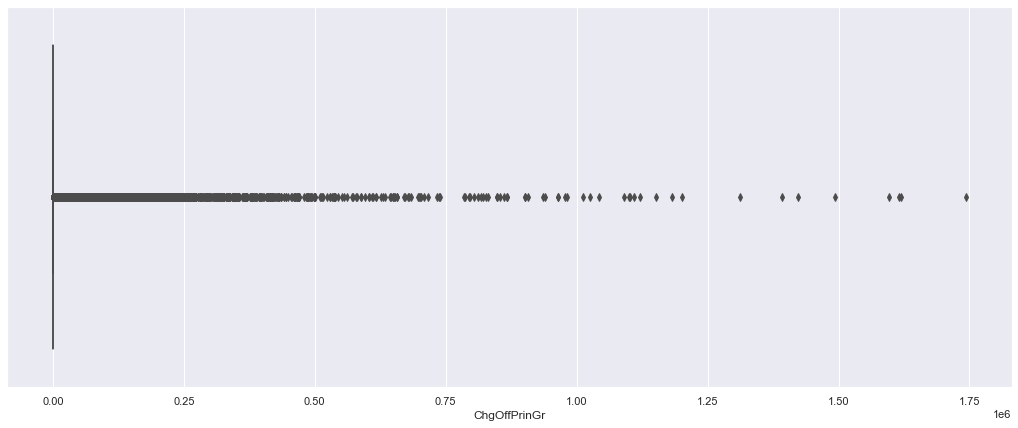

In [71]:
a = dff['ChgOffPrinGr'].nunique()
b = dff['ChgOffPrinGr'].quantile(0.75)
c = dff['ChgOffPrinGr'].mean()
max = dff['ChgOffPrinGr'].max()
min = dff['ChgOffPrinGr'].min()

print(a)
print(b)
print(c)
print(max)
print(min)
plt.figure(figsize = (18,7))
sns.boxplot(x = dff['ChgOffPrinGr'], data = dff)
dff['ChgOffPrinGr'].value_counts()


3
0.0


<AxesSubplot:xlabel='BalanceGross'>

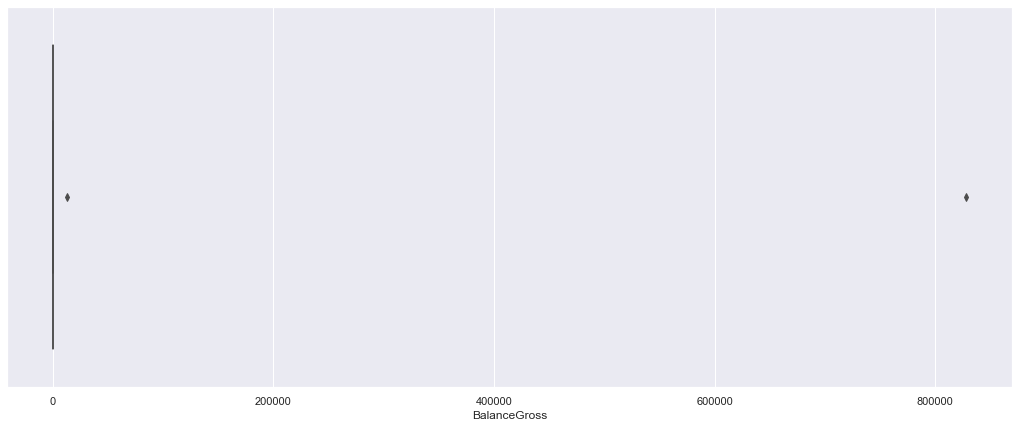

In [72]:
a = dff['BalanceGross'].nunique()
b = dff['BalanceGross'].quantile(0.75)

print(a)
print(b)
plt.figure(figsize = (18,7))
sns.boxplot(x = dff['BalanceGross'], data = dff)

123
3.0
0.0


<AxesSubplot:xlabel='RetainedJob'>

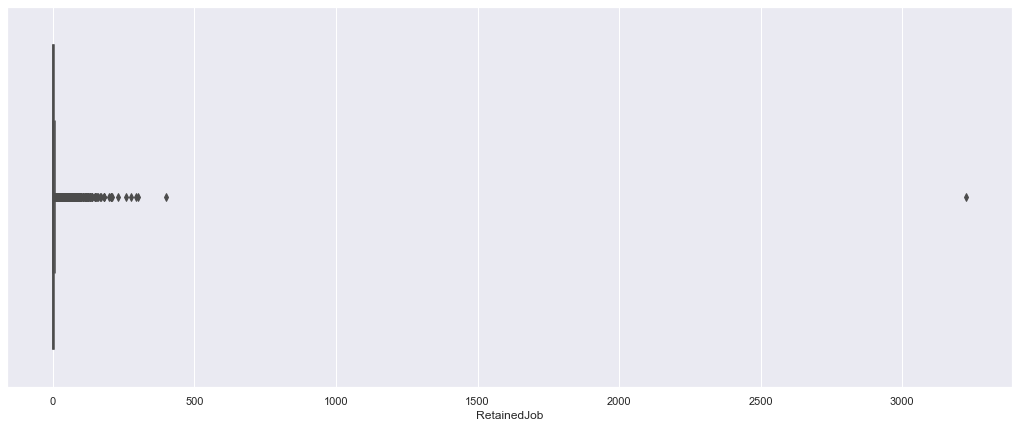

In [73]:
a = dffee['RetainedJob'].nunique()
b = dffee['RetainedJob'].quantile(0.75)
c = dffee['RetainedJob'].quantile(0.50)

print(a)
print(b)
print(c)
plt.figure(figsize = (18,7))
sns.boxplot(x = dffee['RetainedJob'], data = dff)

72
0.0


<AxesSubplot:xlabel='CreateJob'>

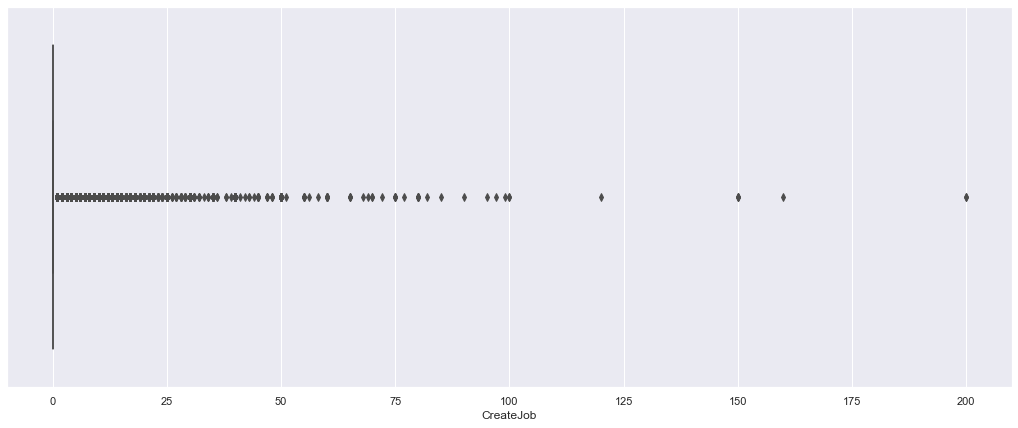

In [74]:
a = dff['CreateJob'].nunique()
b = dff['CreateJob'].quantile(0.75)

print(a)
print(b)
plt.figure(figsize = (18,7))
sns.boxplot(x = dffee['CreateJob'], data = dff)

<br>

## We can see the Median values are Zero

<br><br>
<br>
<br>
<br>
<br>


<br>
<br><br>
<br>
<br>
<br>
<br>


In [75]:
dffee.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,84.0,4.0,0.0,0.0,60000.0,0.0,0.0,60000.0,48000.0
1,60.0,2.0,0.0,0.0,40000.0,0.0,0.0,40000.0,32000.0
2,180.0,7.0,0.0,0.0,287000.0,0.0,0.0,287000.0,215250.0
3,60.0,2.0,0.0,0.0,35000.0,0.0,0.0,35000.0,28000.0
4,240.0,14.0,7.0,7.0,229000.0,0.0,0.0,229000.0,229000.0


In [76]:
from scipy.stats import zscore

In [77]:
dffz = dffee.apply(zscore)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


In [78]:
dffz.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,-0.073301,-0.060864,-0.223849,-0.193278,-0.337215,-0.004329,-0.250169,-0.289371,-0.228550
1,-0.441812,-0.087985,-0.223849,-0.193278,-0.431805,-0.004329,-0.250169,-0.386742,-0.330016
2,1.400746,-0.020184,-0.223849,-0.193278,0.736379,-0.004329,-0.250169,0.815790,0.832092
3,-0.441812,-0.087985,-0.223849,-0.193278,-0.455452,-0.004329,-0.250169,-0.411085,-0.355383
4,2.322025,0.074738,1.428729,0.239491,0.462069,-0.004329,-0.250169,0.533414,0.919290


<AxesSubplot:>

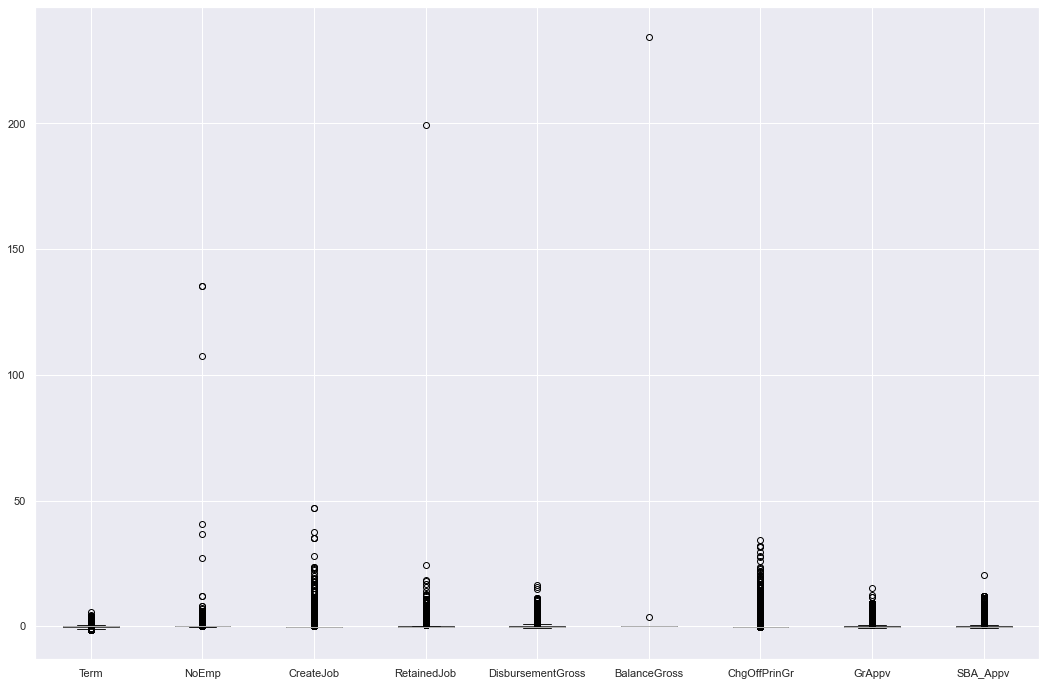

In [79]:
plt.figure(figsize = (18,12))

dffz.boxplot()

In [80]:
dffz[dffz['NoEmp'] == dffz['NoEmp'].max()]

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
44584,-0.073301,135.474081,-0.223849,-0.193278,-0.38451,-0.004329,0.564927,-0.338057,-0.247575


In [81]:
dffz['NoEmp'] = np.where(dffz['NoEmp']>50, 50, dffz['NoEmp'])

dffz['CreateJob'] = np.where(dffz['CreateJob']>50, 50, dffz['CreateJob'])

dffz['RetainedJob'] = np.where(dffz['RetainedJob']>50, 50, dffz['RetainedJob'])

dffz['BalanceGross'] = np.where(dffz['BalanceGross']>50, 50, dffz['BalanceGross'])



<br>
<br>
<br>
<br>

## We are trying to reduce the extreme outliers but same time we are also trying to preserve the High variability of the column 

<br>





<AxesSubplot:>

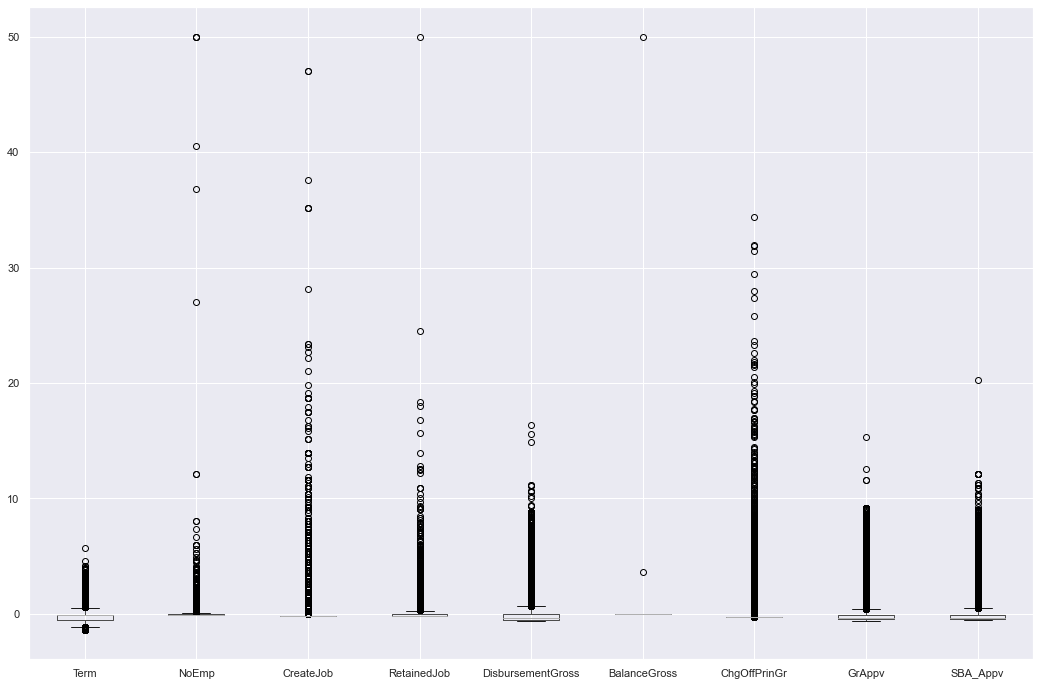

In [82]:
plt.figure(figsize = (18,12))

dffz.boxplot()

<br>
<br>

## Majority of the data points as we see again are within the 10 point on Y-axis

<br>

## We are removing Outliers based on the Data Points density 

<br>

## If there are too less Data points then we are removing from that point

<br>

## Data points density represents the Columns variance/spread

<br>

## For NoEmp we can 10 on Y-axis is the best cut-off above that very few Data points are there which are outliers 

<br>

## So we will cutoff from 10 for NoEmp, ||ly for CreateJob -> 25, RetainedJob -> 15, DisbursementGross -> 12 and so on for other columns.  


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>




In [83]:
dffz['NoEmp'] = np.where(dffz['NoEmp']>10, 10, dffz['NoEmp'])

dffz['CreateJob'] = np.where(dffz['CreateJob']>25, 25, dffz['CreateJob'])

dffz['RetainedJob'] = np.where(dffz['RetainedJob']>15, 15, dffz['RetainedJob'])

dffz['BalanceGross'] = np.where(dffz['BalanceGross']>2, 2, dffz['BalanceGross'])

dffz['DisbursementGross'] = np.where(dffz['DisbursementGross']>12, 12, dffz['DisbursementGross'])

dffz['ChgOffPrinGr'] = np.where(dffz['ChgOffPrinGr']>15, 15, dffz['ChgOffPrinGr'])

dffz['GrAppv'] = np.where(dffz['GrAppv']>9, 9, dffz['GrAppv'])

dffz['SBA_Appv'] = np.where(dffz['GrAppv']>12, 12, dffz['GrAppv'])

dffz['Term'] = np.where(dffz['Term']>5, 5, dffz['Term'])



<AxesSubplot:>

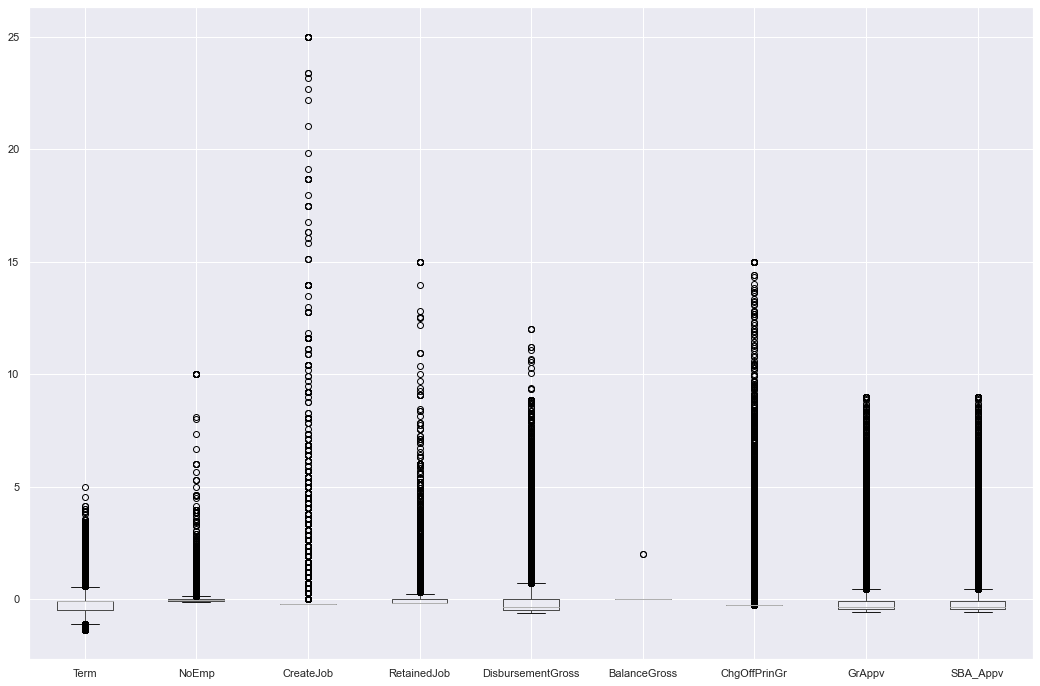

In [84]:
plt.figure(figsize = (18,12))

dffz.boxplot()

<br>

## We ran this 10 times - each run we were removing Outliers by viewing the Graph

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# <center> PCA Covariance Matrix

<br>
<br>
<br>

In [85]:
dffz.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,-0.073301,-0.060864,-0.223849,-0.193278,-0.337215,-0.004329,-0.250169,-0.289371,-0.289371
1,-0.441812,-0.087985,-0.223849,-0.193278,-0.431805,-0.004329,-0.250169,-0.386742,-0.386742
2,1.400746,-0.020184,-0.223849,-0.193278,0.736379,-0.004329,-0.250169,0.815790,0.815790
3,-0.441812,-0.087985,-0.223849,-0.193278,-0.455452,-0.004329,-0.250169,-0.411085,-0.411085
4,2.322025,0.074738,1.428729,0.239491,0.462069,-0.004329,-0.250169,0.533414,0.533414


In [86]:
dfp = np.cov(dffz.T) 

In [87]:
dfp

array([[ 9.99878801e-01,  3.50653014e-02,  1.41264114e-01,
        -6.51644128e-03,  5.14267090e-01,  1.92794258e-05,
        -6.22213206e-02,  5.60284313e-01,  5.60284313e-01],
       [ 3.50653014e-02,  6.40224393e-02,  4.45634985e-02,
         4.74315944e-02,  6.68947864e-02, -4.85865176e-06,
         1.28011394e-02,  6.70334278e-02,  6.70334278e-02],
       [ 1.41264114e-01,  4.45634985e-02,  8.91718393e-01,
         1.47657046e-01,  1.78640000e-01, -1.61959418e-05,
         2.33775518e-02,  1.83233285e-01,  1.83233285e-01],
       [-6.51644128e-03,  4.74315944e-02,  1.47657046e-01,
         2.70539608e-01,  4.04555884e-02, -1.38187364e-05,
         1.30205782e-02,  2.65904626e-02,  2.65904626e-02],
       [ 5.14267090e-01,  6.68947864e-02,  1.78640000e-01,
         4.04555884e-02,  9.94550043e-01,  1.47771458e-04,
         1.89856503e-01,  9.49871128e-01,  9.49871128e-01],
       [ 1.92794258e-05, -4.85865176e-06, -1.61959418e-05,
        -1.38187364e-05,  1.47771458e-04,  1.460822

<br>
<br>
<br>
<br>
<br>
<br>


In [88]:
eig_val, eig_vec = np.linalg.eig(dfp.T)

In [89]:

print('Eigen Values \n \n',eig_val,' \n \n \n \n')

print(' \n \n \n \n', 'Eigen Vectors  \n \n \n',eig_vec)


Eigen Values 
 
 [ 3.39285473e+00  9.11646441e-01  8.71086682e-01  5.02292682e-01
  2.42337487e-01  5.57504204e-02  4.95216251e-02  1.46041809e-04
 -5.36625178e-20]  
 
 
 

 
 
 
 
 Eigen Vectors  
 
 
 [[ 3.65885936e-01  4.63397428e-01 -2.63966450e-01 -7.56350488e-01
   8.43344936e-02 -4.89738074e-02 -1.16277124e-02  1.17666284e-04
   1.09034566e-17]
 [ 3.82611723e-02  1.04534570e-02  4.45748650e-02  2.70858261e-02
   1.91403588e-01  2.78700984e-01 -9.38827259e-01  2.29033925e-04
  -2.95500618e-16]
 [ 1.38548658e-01  3.96587089e-01  8.76951611e-01 -2.13020908e-02
  -2.32211362e-01 -1.01182484e-02  7.38911043e-04  3.63743803e-05
  -4.13972359e-17]
 [ 2.25959927e-02  5.83585031e-02  2.22604768e-01  7.18804500e-02
   9.48109272e-01 -5.16563947e-03  2.05976089e-01  1.61002312e-05
   1.51117689e-16]
 [ 5.19279796e-01 -1.02535774e-01 -3.25421205e-02  2.55927102e-01
   2.17818426e-02 -7.82319172e-01 -2.01939350e-01 -1.65625131e-05
   4.05397020e-18]
 [ 7.07186611e-05 -2.69999944e-05 -5.4608

In [90]:
eig_tot = sum(eig_val)

eig_tot

6.025636109435431

In [91]:
eig_val

array([ 3.39285473e+00,  9.11646441e-01,  8.71086682e-01,  5.02292682e-01,
        2.42337487e-01,  5.57504204e-02,  4.95216251e-02,  1.46041809e-04,
       -5.36625178e-20])

In [92]:
# Created an empty list to store all the output variables 

Cumm_var = []

In [93]:
for x in eig_val:
    y = 100 * (x/eig_tot)
    print('\n',y,'% \n')
    Cumm_var.append(y)
    


 56.30699677259871 % 


 15.129463918864467 % 


 14.45634396573165 % 


 8.335927911638592 % 


 4.021774341951963 % 


 0.9252204970908648 % 


 0.8218489175792447 % 


 0.002423674544525902 % 


 -8.905701709654328e-19 % 



In [94]:
a = 56.30 + 15.12 

b = 56.30 + 15.12 + 14.45

c = 56.30 + 15.12 + 14.45 + 8.33

d = 56.30 + 15.12 + 14.45 + 8.33 + 4.02

e = 56.30 + 15.12 + 14.45 + 8.33 + 4.02 + 1


print('\n',a,'\n \n',b,'\n \n',c,'\n \n',d,'\n \n',e)


 71.42 
 
 85.87 
 
 94.2 
 
 98.22 
 
 99.22


<br>

## Variance and Cummulative Variance

<br>

## 1st Eigen Value represents 1st Principal Component and its variance 

<br>

## We started with 9 columns and now with Just 4 or 5 columns 99% of Variance can be explained

<br>




<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<br>

In [95]:
Cumm_var

[56.30699677259871,
 15.129463918864467,
 14.45634396573165,
 8.335927911638592,
 4.021774341951963,
 0.9252204970908648,
 0.8218489175792447,
 0.002423674544525902,
 -8.905701709654328e-19]

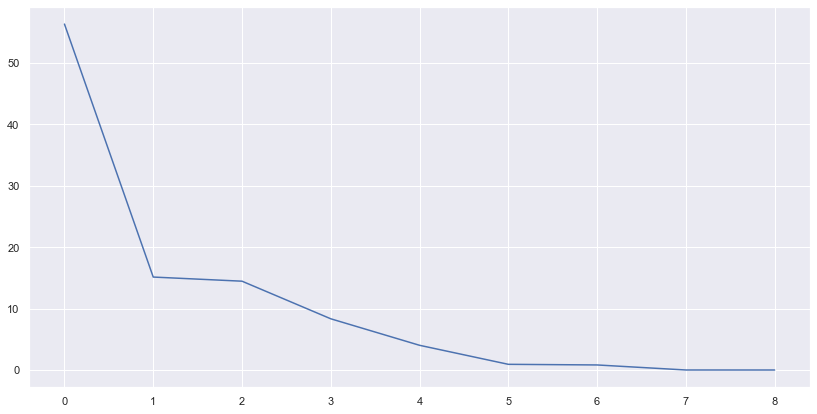

In [96]:
plt.figure(figsize = (14, 7))

plt.plot(Cumm_var)

<br>

## This shows the Variance explaination of each Principal Component 

<br>

## 1st is 56%, 2nd is 15% and so on. 

<br>

## Gives idea which and how many too choose.  

<br>
<br>
<br>
<br>


In [97]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [98]:
dffz

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,-0.073301,-0.060864,-0.223849,-0.193278,-0.337215,-0.004329,-0.250169,-0.289371,-0.289371
1,-0.441812,-0.087985,-0.223849,-0.193278,-0.431805,-0.004329,-0.250169,-0.386742,-0.386742
2,1.400746,-0.020184,-0.223849,-0.193278,0.736379,-0.004329,-0.250169,0.815790,0.815790
3,-0.441812,-0.087985,-0.223849,-0.193278,-0.455452,-0.004329,-0.250169,-0.411085,-0.411085
4,2.322025,0.074738,1.428729,0.239491,0.462069,-0.004329,-0.250169,0.533414,0.533414
...,...,...,...,...,...,...,...,...,...
55584,-0.810324,-0.047304,-0.223849,-0.193278,-0.384510,-0.004329,-0.250169,-0.338057,-0.338057
55585,-0.073301,-0.101545,0.248316,-0.007806,-0.544092,-0.004329,-0.250169,-0.484113,-0.484113
55586,0.494821,-0.047304,-0.223849,-0.193278,-0.148035,-0.004329,-0.250169,-0.094629,-0.094629
55587,-0.426458,-0.101545,-0.223849,-0.131454,-0.535854,-0.004329,-0.051453,-0.532799,-0.532799


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# <center> Clustering  

<br>
<br>


In [99]:
dff5 = dffz.iloc[0:15:]

In [100]:
dff5.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,-0.073301,-0.060864,-0.223849,-0.193278,-0.337215,-0.004329,-0.250169,-0.289371,-0.289371
1,-0.441812,-0.087985,-0.223849,-0.193278,-0.431805,-0.004329,-0.250169,-0.386742,-0.386742
2,1.400746,-0.020184,-0.223849,-0.193278,0.736379,-0.004329,-0.250169,0.815790,0.815790
3,-0.441812,-0.087985,-0.223849,-0.193278,-0.455452,-0.004329,-0.250169,-0.411085,-0.411085
4,2.322025,0.074738,1.428729,0.239491,0.462069,-0.004329,-0.250169,0.533414,0.533414


<br>

## Running clustering only on 5 rows because its a very Heavy processing Algorithm 

<br>

## PC was unable to handle the load. 

<br><br>
<br>
<br>

<br>
<br>


In [101]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [102]:
wardlink = linkage(dff5, method = 'ward' )

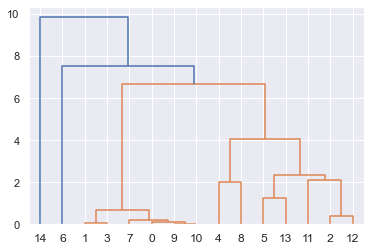

In [103]:


dendrogram = dendrogram(wardlink)

In [104]:
dendrogram

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [30.0, 30.0, 53.75, 53.75],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [90.0, 90.0, 121.25, 121.25],
  [41.875, 41.875, 105.625, 105.625],
  [15.0, 15.0, 73.75, 73.75],
  [5.0, 5.0, 44.375, 44.375]],
 'dcoord': [[0.0, 0.041765319927317315, 0.041765319927317315, 0.0],
  [0.0, 0.027120549285265097, 0.027120549285265097, 0.0],
  [0.0, 0.10140934860297086, 0.10140934860297086, 0.027120549285265097],
  [0.0, 0.22337965273209093, 0.22337965273209093, 0.10140934860297086],
  [0.041765319927317315,
   0.6834598266848806,
   0.6834598266848806,
   0.22337965273209093],
  [0.0, 2.0282498874216306, 2.0282498874216306, 0.0],
  [0.0, 1.2493522440455695, 1.2493522440455695, 0.0],
  [0.0, 0.3996957137275489, 0.3996957137275489, 0.0],
  [0.0, 2.110310439205919, 2.110

In [105]:
from scipy.cluster.hierarchy import fcluster  

In [106]:
cluster = fcluster(wardlink, 3, criterion = 'maxclust')

In [107]:
cluster

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3], dtype=int32)

In [108]:
dff5.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,-0.073301,-0.060864,-0.223849,-0.193278,-0.337215,-0.004329,-0.250169,-0.289371,-0.289371
1,-0.441812,-0.087985,-0.223849,-0.193278,-0.431805,-0.004329,-0.250169,-0.386742,-0.386742
2,1.400746,-0.020184,-0.223849,-0.193278,0.736379,-0.004329,-0.250169,0.815790,0.815790
3,-0.441812,-0.087985,-0.223849,-0.193278,-0.455452,-0.004329,-0.250169,-0.411085,-0.411085
4,2.322025,0.074738,1.428729,0.239491,0.462069,-0.004329,-0.250169,0.533414,0.533414


In [109]:


dff5['Clusters'] = cluster

In [110]:
dff5.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,Clusters
0,-0.073301,-0.060864,-0.223849,-0.193278,-0.337215,-0.004329,-0.250169,-0.289371,-0.289371,1
1,-0.441812,-0.087985,-0.223849,-0.193278,-0.431805,-0.004329,-0.250169,-0.386742,-0.386742,1
2,1.400746,-0.020184,-0.223849,-0.193278,0.736379,-0.004329,-0.250169,0.815790,0.815790,1
3,-0.441812,-0.087985,-0.223849,-0.193278,-0.455452,-0.004329,-0.250169,-0.411085,-0.411085,1
4,2.322025,0.074738,1.428729,0.239491,0.462069,-0.004329,-0.250169,0.533414,0.533414,1


<br>


## The Clustering has been done.

<br>

## We have now added the Cluster to the Dataframe. 

<br>
<br>
<br><br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>
<br>

## Different Methods - Using Method feature of linkage 

<br>



In [111]:
wardlink = linkage(dff5, method = 'ward' )

In [112]:
wardlink

array([[ 9.        , 10.        ,  0.02712055,  2.        ],
       [ 1.        ,  3.        ,  0.04176532,  2.        ],
       [ 0.        , 15.        ,  0.10140935,  3.        ],
       [ 7.        , 17.        ,  0.22337965,  4.        ],
       [ 2.        , 12.        ,  0.39969571,  2.        ],
       [16.        , 18.        ,  0.68345983,  6.        ],
       [ 5.        , 13.        ,  1.24935224,  2.        ],
       [ 4.        ,  8.        ,  2.02824989,  2.        ],
       [11.        , 19.        ,  2.11031044,  3.        ],
       [21.        , 23.        ,  2.36462052,  5.        ],
       [22.        , 24.        ,  4.03667791,  7.        ],
       [20.        , 25.        ,  6.6833607 , 13.        ],
       [ 6.        , 26.        ,  7.65164144, 14.        ],
       [14.        , 27.        , 10.19863216, 15.        ]])

In [113]:
link_mthd_2 = linkage(dff5, method = 'single') 

In [114]:
link_mthd_3 = linkage(dff5, method = 'complete') 

In [115]:
link_mthd_4 = linkage(dff5, method = 'average') 


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


In [117]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [118]:
from scipy.cluster.hierarchy import dendrogram, linkage

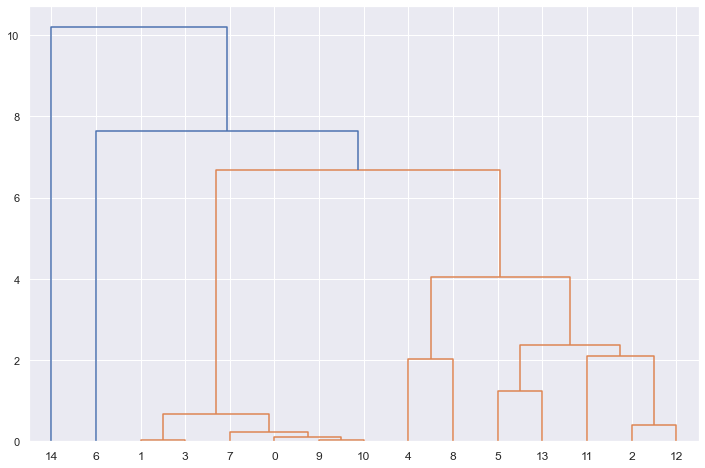

In [119]:
plt.figure(figsize = (12,8)) 

a = dendrogram(wardlink)



<br>
<br>
<br>
<br>
<br>
<br>
<br>


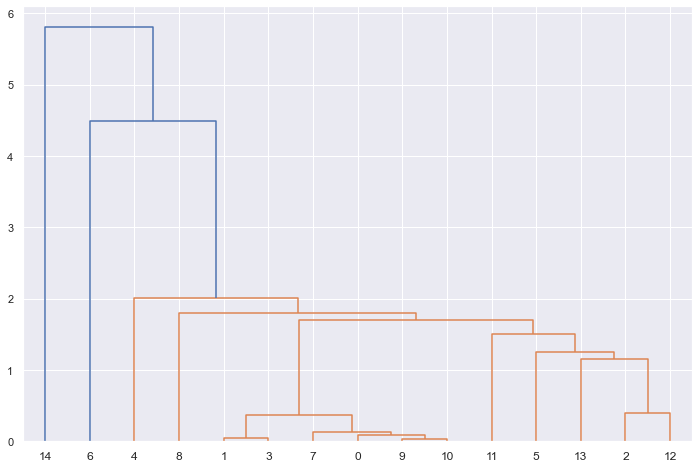

In [120]:
plt.figure(figsize = (12,8)) 

dend_2 = dendrogram(link_mthd_2)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


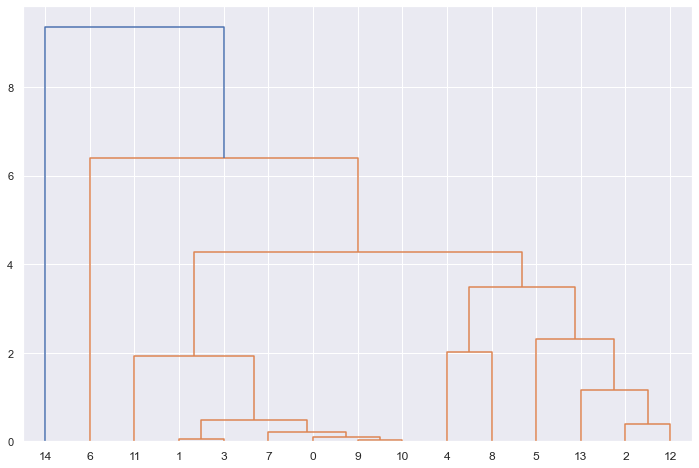

In [121]:
plt.figure(figsize = (12,8)) 

dend_3 = dendrogram(link_mthd_3)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


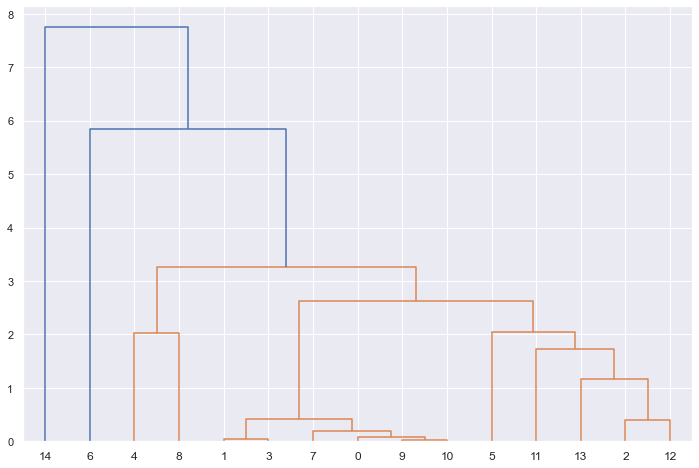

In [122]:
plt.figure(figsize = (12,8)) 
dend_4 = dendrogram(link_mthd_4)

<br>

## Different Linkage methods is giving different Dendrograms/Cluster combinations

<br>

## We are changing the methods and this is giving the difference

<br>
<br>
<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


In [123]:
cluster = fcluster(wardlink, 5, criterion = 'distance')

In [124]:
cluster

array([1, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2, 2, 2, 4], dtype=int32)

In [125]:


dendrogram

<function scipy.cluster.hierarchy.dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')>


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# <center> K-Means Clustering - Partioning - Non-Hierarchical 

<br>
<br>



In [126]:
dff5

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,Clusters
0,-0.073301,-0.060864,-0.223849,-0.193278,-0.337215,-0.004329,-0.250169,-0.289371,-0.289371,1
1,-0.441812,-0.087985,-0.223849,-0.193278,-0.431805,-0.004329,-0.250169,-0.386742,-0.386742,1
2,1.400746,-0.020184,-0.223849,-0.193278,0.736379,-0.004329,-0.250169,0.815790,0.815790,1
3,-0.441812,-0.087985,-0.223849,-0.193278,-0.455452,-0.004329,-0.250169,-0.411085,-0.411085,1
4,2.322025,0.074738,1.428729,0.239491,0.462069,-0.004329,-0.250169,0.533414,0.533414,1
5,0.479467,0.142540,-0.223849,-0.193278,1.824162,-0.004329,-0.250169,1.935557,1.935557,1
6,-0.672132,0.495107,-0.223849,-0.193278,2.216710,-0.004329,3.902196,2.339647,2.339647,2
7,-0.073301,-0.101545,-0.223849,-0.193278,-0.408157,-0.004329,-0.250169,-0.362399,-0.362399,1
8,3.197240,-0.087985,-0.223849,-0.193278,0.821510,-0.004329,-0.250169,0.903424,0.903424,1
9,-0.073301,-0.074425,-0.223849,-0.193278,-0.289920,-0.004329,-0.250169,-0.240686,-0.240686,1


<br>
<br>

<br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>

# <center> The Correct Cluster Number - using WSS Plot



<br><br>
<br><br>
<br>


## Numerical Columns + Scaled Data + Limited Rows due to Load Heavy algorithm

<br>
<br>
<br>




In [127]:
K_means_2 = KMeans(n_clusters = 2 )

In [128]:
K_means_2.fit(dff5)

KMeans(n_clusters=2)

In [129]:
K_means_2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [130]:
K_means_2.inertia_

67.95937537873195

In [131]:
K_means_3 = KMeans(n_clusters = 3 )
K_means_3.fit(dff5)
K_means_3.inertia_

38.685567019627456

In [132]:
K_means_4 = KMeans(n_clusters = 4 )
K_means_4.fit(dff5)
K_means_4.inertia_

15.155529103796546

<br>

## We can keep doing this or we can use for-loop as well

<br>

## Then we can do a plotting in WSS Plot 

<br>

## Which will help us to understand which Cluster-Number is correct 

<br>
<br>
<br>


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


In [133]:
wss = []

In [134]:
for i in range(1,11):
    K = KMeans(n_clusters = i)
    K.fit(dff5)
    wss.append(K.inertia_)

In [135]:
wss

[119.96542433896636,
 67.95937537873195,
 39.58754119659155,
 15.155529103796546,
 8.204527584894441,
 5.705635468816588,
 3.1821074125864075,
 1.1252086096734781,
 0.34476809482262805,
 0.11120942747656443]

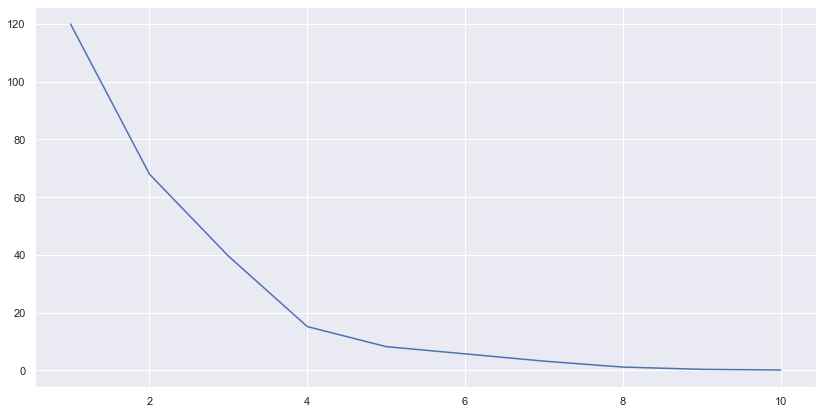

In [136]:
plt.figure(figsize=(14,7)) 

plt.plot(range(1,11),wss)

<br>

## We can clearly see here that K = 4, is performing the best

<br>

## After K=4, there is no significant drop

<br>

## So, 4 clusters is best for the Dataset

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>


In [137]:
K_4 = KMeans( n_clusters = 4 )

In [138]:
K_4.fit(dff5)

KMeans(n_clusters=4)

In [139]:
K_4.labels_

array([0, 0, 1, 0, 1, 1, 3, 0, 1, 0, 0, 0, 1, 1, 2])

In [140]:
dff5['KMeans_Clusters'] = K_4.labels_

In [141]:
dff5

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,Clusters,KMeans_Clusters
0,-0.073301,-0.060864,-0.223849,-0.193278,-0.337215,-0.004329,-0.250169,-0.289371,-0.289371,1,0
1,-0.441812,-0.087985,-0.223849,-0.193278,-0.431805,-0.004329,-0.250169,-0.386742,-0.386742,1,0
2,1.400746,-0.020184,-0.223849,-0.193278,0.736379,-0.004329,-0.250169,0.815790,0.815790,1,1
3,-0.441812,-0.087985,-0.223849,-0.193278,-0.455452,-0.004329,-0.250169,-0.411085,-0.411085,1,0
4,2.322025,0.074738,1.428729,0.239491,0.462069,-0.004329,-0.250169,0.533414,0.533414,1,1
5,0.479467,0.142540,-0.223849,-0.193278,1.824162,-0.004329,-0.250169,1.935557,1.935557,1,1
6,-0.672132,0.495107,-0.223849,-0.193278,2.216710,-0.004329,3.902196,2.339647,2.339647,2,3
7,-0.073301,-0.101545,-0.223849,-0.193278,-0.408157,-0.004329,-0.250169,-0.362399,-0.362399,1,0
8,3.197240,-0.087985,-0.223849,-0.193278,0.821510,-0.004329,-0.250169,0.903424,0.903424,1,1
9,-0.073301,-0.074425,-0.223849,-0.193278,-0.289920,-0.004329,-0.250169,-0.240686,-0.240686,1,0


<br>

## We can see that the both cluster are present side-by-side

<br>

## Hierarchical Clustering vs Kmeans Clustering 

<br>
<br>
<br>
<br>


<br>
<br>
<br>
<br>
<br>
<br><br>
<br>
<br><br>
<br>
<br>

In [142]:
dff5

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,Clusters,KMeans_Clusters
0,-0.073301,-0.060864,-0.223849,-0.193278,-0.337215,-0.004329,-0.250169,-0.289371,-0.289371,1,0
1,-0.441812,-0.087985,-0.223849,-0.193278,-0.431805,-0.004329,-0.250169,-0.386742,-0.386742,1,0
2,1.400746,-0.020184,-0.223849,-0.193278,0.736379,-0.004329,-0.250169,0.815790,0.815790,1,1
3,-0.441812,-0.087985,-0.223849,-0.193278,-0.455452,-0.004329,-0.250169,-0.411085,-0.411085,1,0
4,2.322025,0.074738,1.428729,0.239491,0.462069,-0.004329,-0.250169,0.533414,0.533414,1,1
5,0.479467,0.142540,-0.223849,-0.193278,1.824162,-0.004329,-0.250169,1.935557,1.935557,1,1
6,-0.672132,0.495107,-0.223849,-0.193278,2.216710,-0.004329,3.902196,2.339647,2.339647,2,3
7,-0.073301,-0.101545,-0.223849,-0.193278,-0.408157,-0.004329,-0.250169,-0.362399,-0.362399,1,0
8,3.197240,-0.087985,-0.223849,-0.193278,0.821510,-0.004329,-0.250169,0.903424,0.903424,1,1
9,-0.073301,-0.074425,-0.223849,-0.193278,-0.289920,-0.004329,-0.250169,-0.240686,-0.240686,1,0


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


In [143]:
dff5['Clusters'].value_counts()

1    13
2     1
3     1
Name: Clusters, dtype: int64

In [144]:
dff5['KMeans_Clusters'].value_counts().sort_index()

0    7
1    6
2    1
3    1
Name: KMeans_Clusters, dtype: int64

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


In [145]:
dff5[dff5['KMeans_Clusters'] == 0].head(5)

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,Clusters,KMeans_Clusters
0,-0.073301,-0.060864,-0.223849,-0.193278,-0.337215,-0.004329,-0.250169,-0.289371,-0.289371,1,0
1,-0.441812,-0.087985,-0.223849,-0.193278,-0.431805,-0.004329,-0.250169,-0.386742,-0.386742,1,0
3,-0.441812,-0.087985,-0.223849,-0.193278,-0.455452,-0.004329,-0.250169,-0.411085,-0.411085,1,0
7,-0.073301,-0.101545,-0.223849,-0.193278,-0.408157,-0.004329,-0.250169,-0.362399,-0.362399,1,0
9,-0.073301,-0.074425,-0.223849,-0.193278,-0.289920,-0.004329,-0.250169,-0.240686,-0.240686,1,0


In [146]:
dff5[dff5['Clusters'] == 1].head(5)

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,Clusters,KMeans_Clusters
0,-0.073301,-0.060864,-0.223849,-0.193278,-0.337215,-0.004329,-0.250169,-0.289371,-0.289371,1,0
1,-0.441812,-0.087985,-0.223849,-0.193278,-0.431805,-0.004329,-0.250169,-0.386742,-0.386742,1,0
2,1.400746,-0.020184,-0.223849,-0.193278,0.736379,-0.004329,-0.250169,0.815790,0.815790,1,1
3,-0.441812,-0.087985,-0.223849,-0.193278,-0.455452,-0.004329,-0.250169,-0.411085,-0.411085,1,0
4,2.322025,0.074738,1.428729,0.239491,0.462069,-0.004329,-0.250169,0.533414,0.533414,1,1


<br>
<br>
<br>
<br>


In [147]:
dff5[dff5['Clusters'] == 2].head(5)

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,Clusters,KMeans_Clusters
6,-0.672132,0.495107,-0.223849,-0.193278,2.21671,-0.004329,3.902196,2.339647,2.339647,2,3


<br>
<br>
<br>
<br>


In [148]:
dff5[dff5['Clusters'] == 3].head(5)

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,Clusters,KMeans_Clusters
14,2.322025,-0.101545,6.85863,-0.193278,0.443151,-0.004329,-0.250169,0.51394,0.51394,3,2


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<br>

# Creating a Summary for Clustering - to understand better 


In [149]:
Frequency = dff5.groupby('Clusters').mean()

Frequency['Freq_of_each_Cluster']  = dff5.Clusters.value_counts().sort_index()

Frequency['KMeans_Freq_of_each_Cluster']  = dff5.KMeans_Clusters.value_counts().sort_index()

Frequency.iloc[:,6:13]


,ChgOffPrinGr,GrAppv,SBA_Appv,KMeans_Clusters,Freq_of_each_Cluster,KMeans_Freq_of_each_Cluster
Clusters,,,,,,
1,-0.250169,0.385260,0.385260,0.461538,13,6
2,3.902196,2.339647,2.339647,3.000000,1,1
3,-0.250169,0.513940,0.513940,2.000000,1,1



<br>

## Hierarchical and KMeans/Non-Hierarchical Clustering performed so differently 

<br>

## We can see from the Frequency of each Cluster columns

<br>



<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
